In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv('../data/web_traffic_train_1.csv').fillna(0)
train_df.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [3]:
import re
def get_language(url):
    res = re.search('[a-z][a-z].wikipedia.org',url)
    if res:
        return res[0][0:2]
    return 'na'

languages = {'en':'English','ja':'Japanese','de':'German','na':'Media','fr':'French','zh':'Chinese',
             'ru':'Russian','es':'Spanish'}

train_df['lang'] = train_df.Page.map(get_language)

lang_sets = {}
avgs = {}

for lang in languages.keys():
    lang_sets[lang] = train_df[train_df.lang==lang].iloc[:,0:-1]
    avgs[lang] = lang_sets[lang].iloc[:,1:].sum(axis=0)/lang_sets[lang].shape[0]
    
train_df = train_df.drop('lang',axis=1)

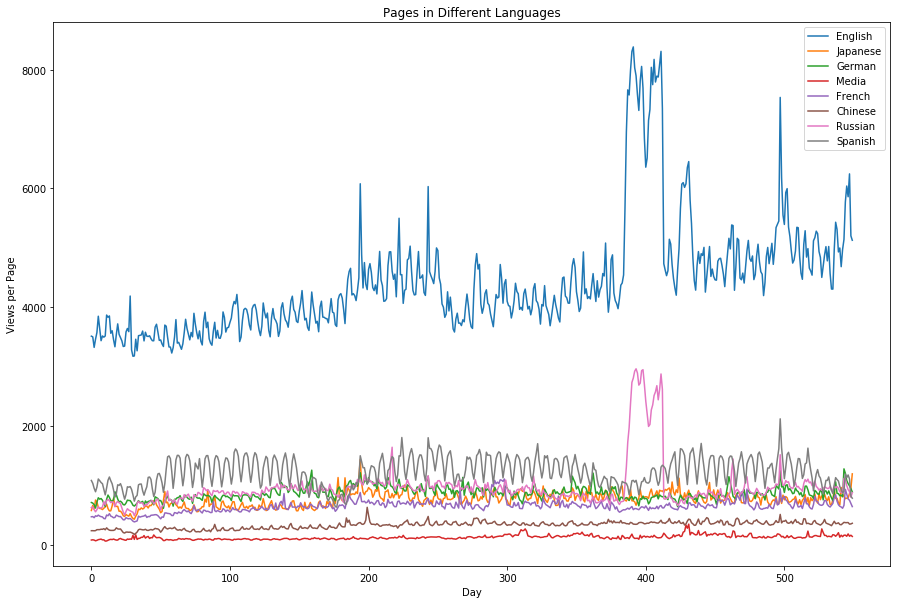

In [4]:
days = [r for r in range(avgs['en'].shape[0])]

fig = plt.figure(1,figsize=[15,10])
plt.ylabel('Views per Page')
plt.xlabel('Day')
plt.title('Pages in Different Languages')

for lang in languages.keys():
    plt.plot(days,avgs[lang],label = languages[lang])

plt.legend()
plt.show()
fig.savefig('views_comparison.png')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


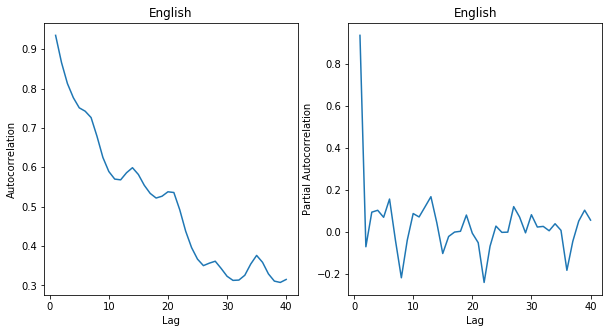

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


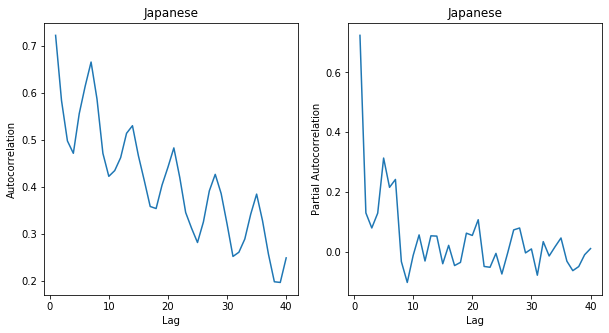

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


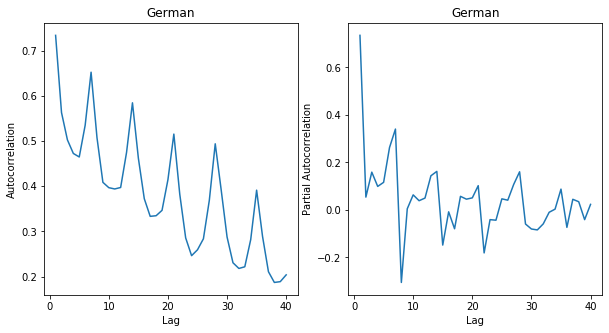

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


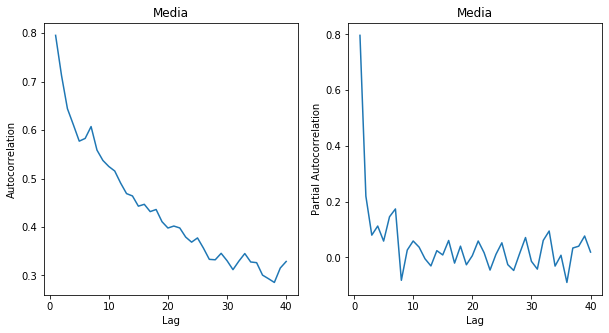

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


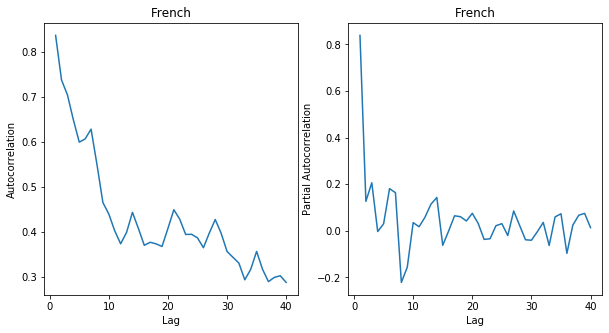

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


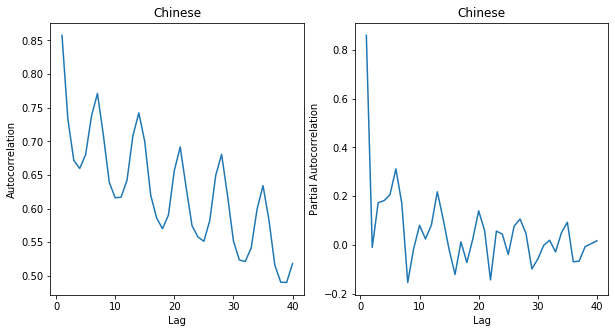

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


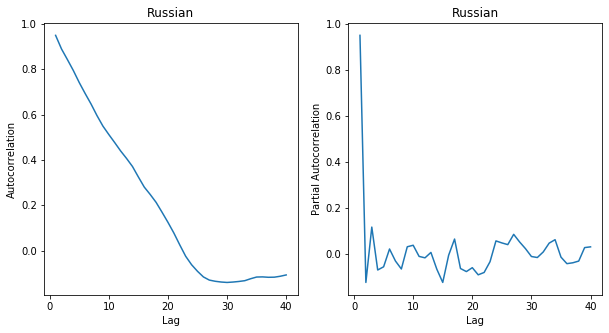

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


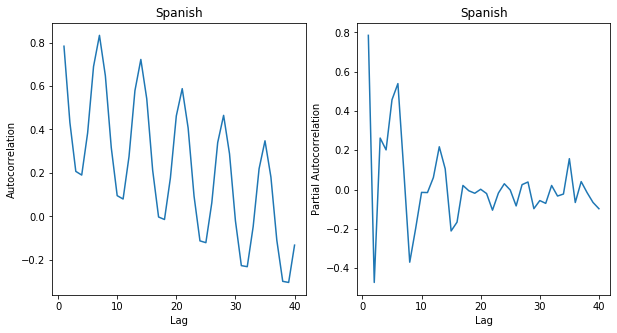

In [5]:
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf

for key in avgs:
    fig = plt.figure(1,figsize=[10,5])
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    data = np.array(avgs[key])
    autocorr = acf(data)
    pac = pacf(data)

    x = [x for x in range(len(pac))]
    ax1.plot(x[1:],autocorr[1:])

    ax2.plot(x[1:],pac[1:])
    ax1.set_xlabel('Lag')
    ax1.set_ylabel('Autocorrelation')
    ax1.set_title(languages[key])

    ax2.set_xlabel('Lag')
    ax2.set_ylabel('Partial Autocorrelation')
    ax2.set_title(languages[key])
    plt.show()

en


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


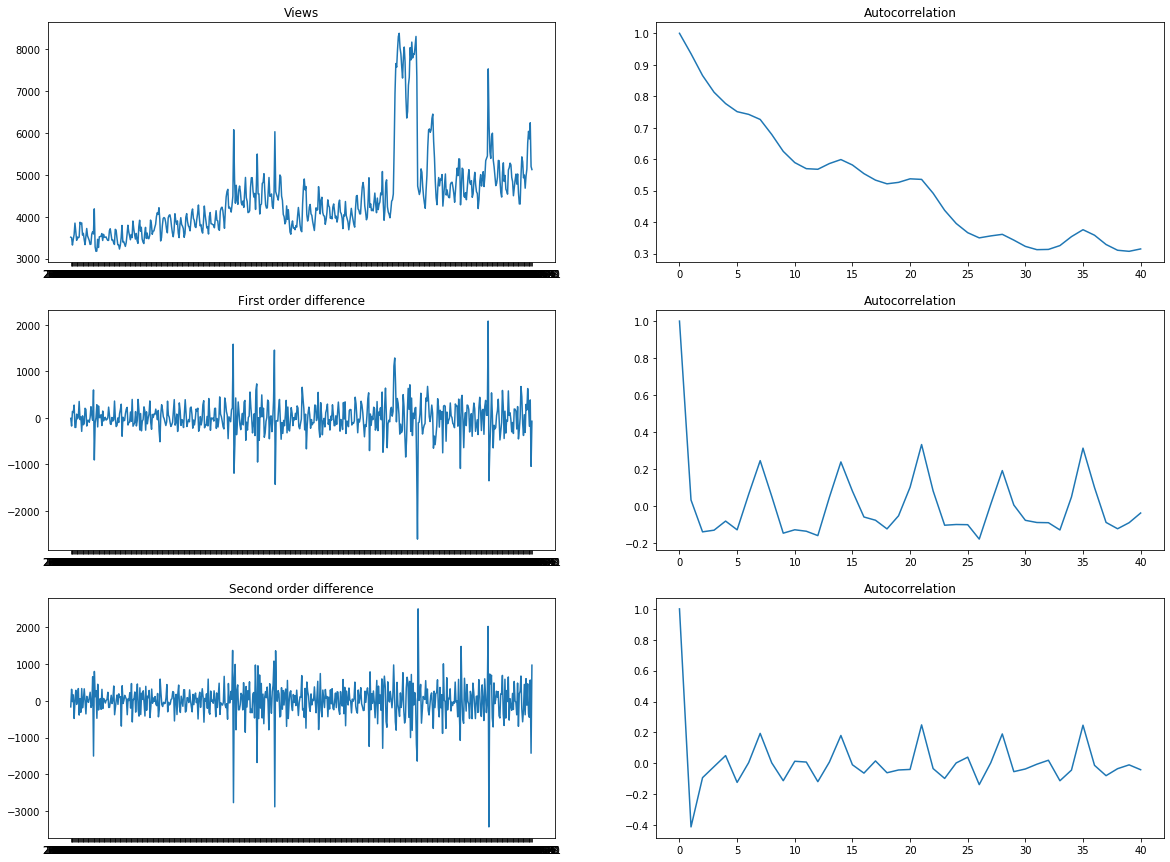

In [6]:
for key in ['en']:
    print(key)
    data = pd.DataFrame(avgs[key])
    data = data.iloc[:,0]
    
    fig = plt.figure(1,figsize=[20,15])
    ax1 = fig.add_subplot(321)
    ax2 = fig.add_subplot(322)
    ax3 = fig.add_subplot(323)
    ax4 = fig.add_subplot(324)
    ax5 = fig.add_subplot(325)
    ax6 = fig.add_subplot(326)
    
    autocorr = acf(data)
    ax1.plot(data)
    ax1.set_title('Views')
    ax2.plot(autocorr)
    ax2.set_title('Autocorrelation')
    
    data = data.diff()
    data = data.iloc[1:]
    
    autocorr = acf(data)
    ax3.plot(data)
    ax3.set_title('First order difference')
    ax4.plot(autocorr)
    ax4.set_title('Autocorrelation')
    
    data = data.diff()
    data = data.iloc[1:]
    
    autocorr = acf(data)
    ax5.plot(data)
    ax5.set_title('Second order difference')
    ax6.plot(autocorr)
    ax6.set_title('Autocorrelation')
    
    plt.show()

In [7]:
params = {
    'en': [4,1,0],
    'ja': [7,1,1],
    'de': [7,1,1],
    'na': [4,1,0],
    'fr': [4,1,0],
    'zh': [7,1,1],
    'ru': [4,1,0],
    'es': [7,1,1]
}
# params = {
#     'en': [7,1,0],
#     'ja': [7,1,0],
#     'de': [7,1,1],
#     'na': [7,1,0],
#     'fr': [7,1,0],
#     'zh': [7,1,1],
#     'ru': [7,1,0],
#     'es': [7,1,0]
# }

en


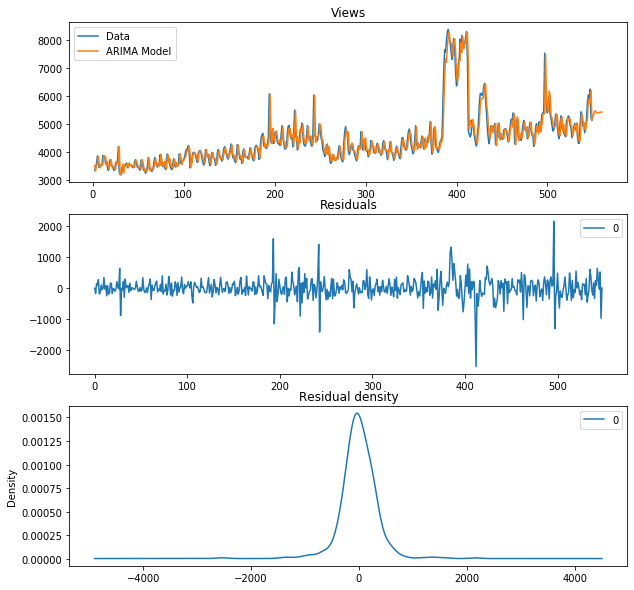

In [8]:
from statsmodels.tsa.arima_model import ARIMA
for key in ['en']:
    print(key)
    data = np.nan_to_num(np.array(pd.DataFrame(avgs[key]).fillna(0)))
    arima = ARIMA(data, params[key])
    model = arima.fit(disp=False)
    pred = model.predict(2, 560, typ='levels')
    
    x = [i for i in range(561)]
    i=0
    
    fig = plt.figure(1,figsize=[10,10])
    ax1 = fig.add_subplot(311)
    ax2 = fig.add_subplot(312)
    ax3 = fig.add_subplot(313)
    ax1.plot(x[2:len(data)], data[2:], label='Data')
    ax1.set_title('Views')
    ax1.plot(x[2:], pred, label='ARIMA Model')
    ax1.legend()
    
    residuals = pd.DataFrame(model.resid).fillna(0)
    residuals.plot(title="Residuals", ax=ax2)
    residuals.plot(kind='kde', title='Residual density', ax=ax3)
    
    plt.savefig(fname='arima_rediction')
    
    plt.show()

In [9]:
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(data[2:], pred[:len(data[2:])], squared=False)
rms

337.86238209683825